<a href="https://colab.research.google.com/github/Paolino1994/IntroIA/blob/main/Integrador%20Clase%206/Logistic_Regression_Human_Activity_Recognition_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import os
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt



In [6]:
#Load Dataset
X_train = np.loadtxt("X_train.txt")
y_train = np.loadtxt("y_train.txt").astype(int)


X_test = np.loadtxt("X_test.txt")
y_test = np.loadtxt("y_test.txt").astype(int)

print("Estructura features del dataset: {}".format(X_train.shape))
print("Estructura de las etiquetas: {}".format(y_train.shape))

Estructura features del dataset: (7352, 561)
Estructura de las etiquetas: (7352,)


In [7]:
#Ver estructura
df = pd.DataFrame(data=X_train)
df.describe()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


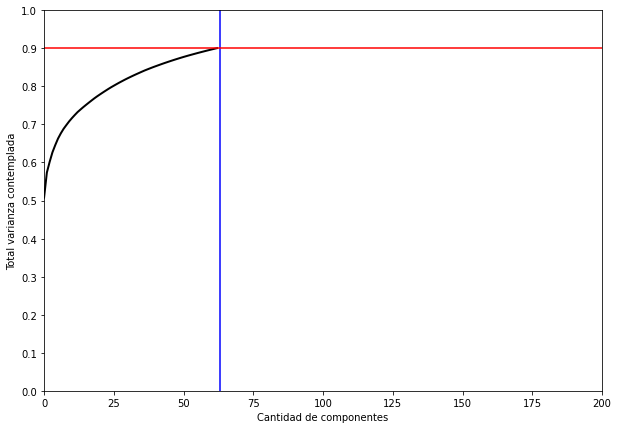

In [8]:
# Aplico PCA
RANDOM_STATE = 17
n_clases = np.unique(y_train)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
pca = PCA(n_components=0.9, random_state=RANDOM_STATE).fit(X_scaled)
X_pca = pca.transform(X_scaled)


plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 200)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(63, c='b')
plt.axhline(0.9, c='r')
plt.show();

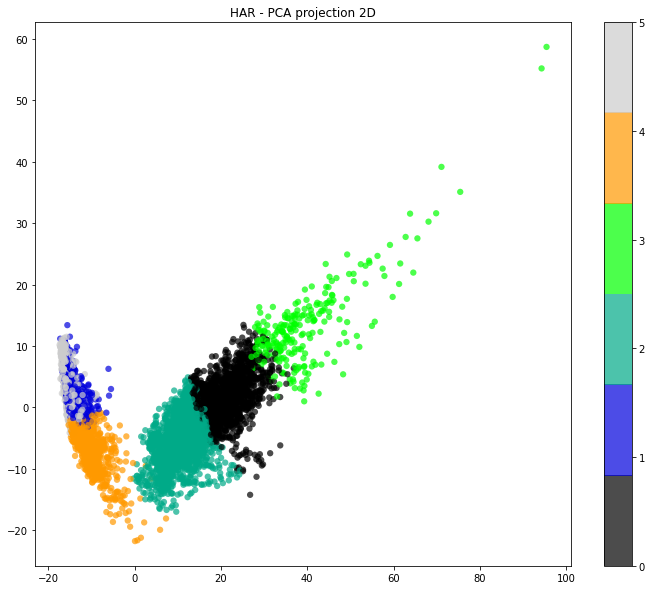

In [9]:
#Aplico K-Means
clusters=6
kmeans = KMeans(n_clusters=clusters, n_init=100, random_state=RANDOM_STATE)
kmeans.fit(X_pca)
cluster_labels_mov = kmeans.labels_

# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_mov, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', clusters))
plt.colorbar()
plt.title('HAR - PCA projection 2D');

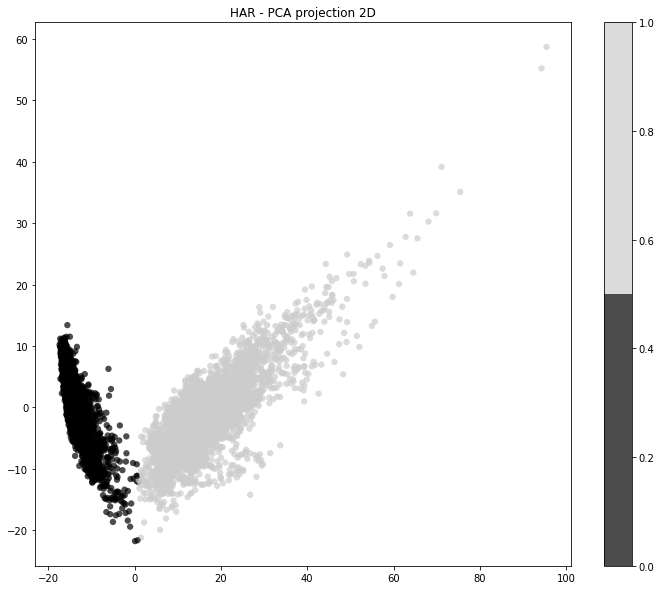

In [10]:
#Aplico K-Means CON 2 CLUSTERS
clusters=2
kmeans_move = KMeans(n_clusters=clusters, n_init=100, random_state=RANDOM_STATE)
kmeans_move.fit(X_pca)
cluster_labels_mov = kmeans_move.labels_

# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_mov, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', clusters))
plt.colorbar()
plt.title('HAR - PCA projection 2D');

Mis labels son
0.	WALKING
1.	WALKING_UPSTAIRS
2.	WALKING_DOWNSTAIRS
3.	SITTING
4.	STANDING
5.	LAYING


In [11]:
moving=y_train<=2
still=y_train>2
newY=y_train.copy()
newY[moving]=0
newY[still]=1


Usando en movimiento vs quieto

In [12]:
#Logistic Regression With moving vs still
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, newY)
#print(logistic_regression.model)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [13]:
moving=y_test<=2
still=y_test>2
newYtest=y_test.copy()
newYtest[moving]=0
newYtest[still]=1

prediction=logistic_regression.predict(X_test)
print("MSE",sum((prediction-newYtest)**2)/len(prediction))
print("Score",logistic_regression.score(X_test, newYtest))

MSE 0.01153715643026807
Score 0.9884628435697319


Usando las 6 clases

In [14]:
#Logistic Regression With original expected Result
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
#print(logistic_regression.model)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [15]:
prediction=logistic_regression.predict(X_test)
print("MSE",sum((prediction-y_test)**2)/len(prediction))
print("Score",logistic_regression.score(X_test, y_test))

MSE 0.05191720393620631
Score 0.9582626399728538
[5 5 5 ... 2 2 2]
